# Lending Club Dataset Exploration 2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn import preprocessing, pipeline, metrics, model_selection

pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 100
sns.set_style("white")
%matplotlib inline

__Datasets questions:__

1. Target variale distribution
2. Numerical features (float64 and int64)
3. Object features and possible convert to numerical features
4. Feature correlation
5. Missing value handling


In [3]:
full_clean_df = pd.read_csv("full_clean_data.csv")

In [9]:
# set id is the index
full_clean_df.set_index('id', inplace=True)

In [11]:
full_clean_df.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0,Jan-1985,735,739,1,NaN,3,0,13648,83.7%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-2015,171.62,Jul-2020,724,720,0,NaN,1,Individual,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,N,N
1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking a...,car,bike,309xx,GA,1.00,0,Apr-1999,740,744,5,NaN,3,0,1687,9.4%,4,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-2013,119.66,Oct-2016,499,0,0,NaN,1,Individual,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,N,N
1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-2001,735,739,2,NaN,2,0,2956,98.5%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,Jun-2014,649.91,Jun-2017,739,735,0,NaN,1,Individual,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,N,N
1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1076863,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & ...",other,personel,917xx,CA,20.00,0,Feb-1996,690,694,1,35.0,10,0,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.00,Jan-2015,357.48,Apr-2016,604,600,0,NaN,1,Individual,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,N,N
1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medi

## Target variable: loan_status

Sample size of label "Charge Off" has ~ 20% size of "Fully Paid". Normally, label with smaller group has larger impact on the evaluation. As the smaller group, "charge off" has enormous impact on the risk of loan business.


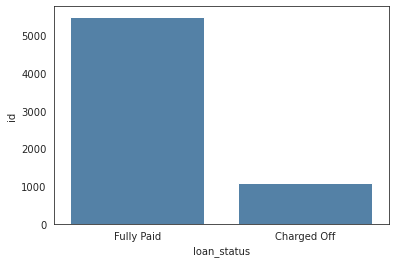

In [13]:
# Target variable loan_status
sns.barplot(x='loan_status', y='id', data=full_clean_df.reset_index(),
            label='Loan data', estimator=np.ma.count, color='steelblue')

"charge off" prediction can be seen as a classification problem, so it's convenient to transform the data type of loan_status to nuemrical type

In [14]:
# Numerical type conversion
full_clean_df['loan_status'] = full_clean_df['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0) 

In [17]:
sum(full_clean_df['loan_status'])/len(full_clean_df['loan_status'])

0.16580625569389615

__group features by data type__


In [25]:
# numeric variables
num_cols = list(full_clean_df.select_dtypes('number').columns)
num_cols.remove('loan_status')

# object variables
obj_cols = list(full_clean_df.select_dtypes('object').columns)


# datetime variables
dt_cols = list(full_clean_df.select_dtypes('datetime').columns)

# index column
id_col = 'id'

# target column
target_col = 'loan_status'

print("Numeric variables: \n", num_cols)
print("Object variables: \n", obj_cols)
print("Datetime variables: \n", dt_cols)
print("Index variable: \n", id_col)
print("Target variable: \n", target_col)

Numeric variables: 
 ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_

In [26]:
# create new df for visulization
import copy
vis_train_df = copy.copy(full_clean_df)

__FICO scores: common features to evaluate  credit info__

The lower boundary range the borrower's FICO at loan origination belongs to.

The upper boundary range the borrower's FICO at loan origination belongs to.


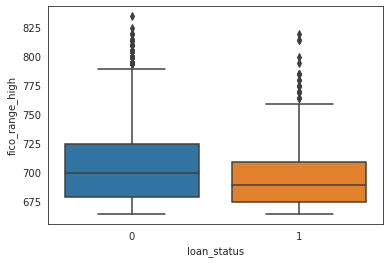

In [27]:
# FICO scores: fico_range_high
sns.boxplot(x='loan_status', y='fico_range_high', data=vis_train_df)

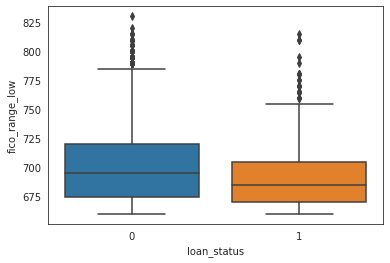

In [28]:
# FICO scores: fico_range_low
sns.boxplot(x='loan_status', y='fico_range_low', data=vis_train_df)

label 1, "charge off", has lower fico score range in general

__The upper boundary range the borrower last FICO pulled belongs__


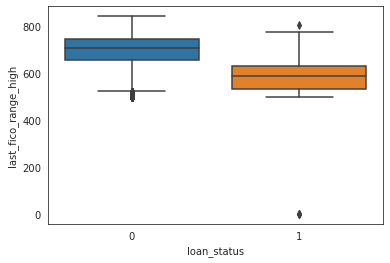

In [52]:
# last_fico_range_high
sns.boxplot(x='loan_status', y='last_fico_range_high', data=vis_train_df)

It could be used for predict

__The lower boundary range the borrower last FICO pulled belongs__

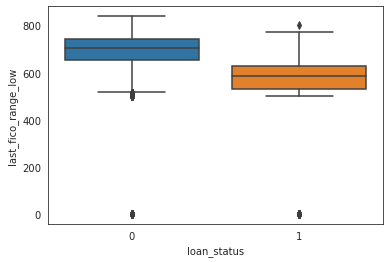

In [54]:
# last_fico_range_low
sns.boxplot(x='loan_status', y='last_fico_range_low', data=vis_train_df)

This feature could be used for prediction.

__The number of accounts on which the borrower is now delinquent.__


nearly all of entries in this column are 0. It's hard to use this feature to predict.

In [42]:
vis_train_df['acc_now_delinq'].value_counts()

0    6578
1       7
2       1
Name: acc_now_delinq, dtype: int64

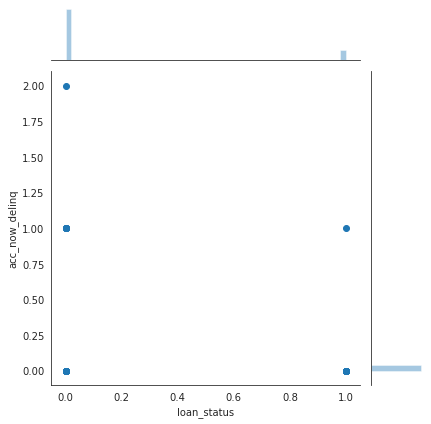

In [43]:
sns.jointplot(x='loan_status', y='acc_now_delinq', data=vis_train_df)

__Number of charge-offs within 12 months__

In [45]:
# chargeoff_within_12_mths
vis_train_df['acc_now_delinq'].value_counts()

0    6578
1       7
2       1
Name: acc_now_delinq, dtype: int64

Hard to use this feature to predict

__The past-due amount owed for the accounts on which the borrower is now delinquent.__

In [46]:
# chargeoff_within_12_mths
vis_train_df['delinq_amnt'].value_counts()

0       6582
1033       1
353        1
321        1
456        1
Name: delinq_amnt, dtype: int64

 Hard to use feature to predict

__Number of public record bankruptcies__

In [47]:
# pub_rec_bankruptcies
vis_train_df['pub_rec_bankruptcies'].value_counts()


0    6140
1     434
2      10
3       1
4       1
Name: pub_rec_bankruptcies, dtype: int64

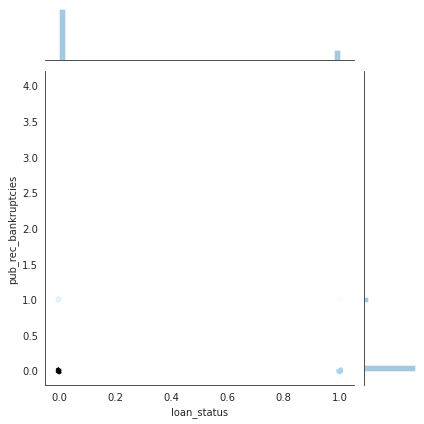

In [49]:
sns.jointplot(x='loan_status', y='pub_rec_bankruptcies', data=vis_train_df,kind="hex")

Hard to use this feature to predict too

__Number of tax liens__

In [51]:
# tax_liens
vis_train_df['tax_liens'].value_counts()



0    6499
1      54
2      21
3       8
4       3
8       1
Name: tax_liens, dtype: int64

Hard to predict use this feature too

__The total number of credit lines currently in the borrower's credit file__

In [55]:
# total_acc
vis_train_df['total_acc'].value_counts()


17    264
18    260
15    260
21    240
24    239
     ... 
56      7
62      5
58      3
65      1
79      1
Name: total_acc, Length: 63, dtype: int64

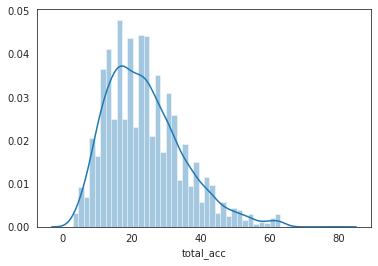

In [57]:
sns.distplot(vis_train_df.total_acc)

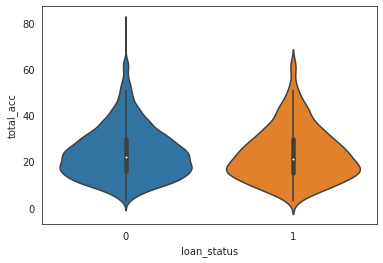

In [60]:
sns.violinplot(x = 'loan_status', y ='total_acc', data = vis_train_df)

This feature could be used for prediction

__The number of open credit lines in the borrower's credit file__

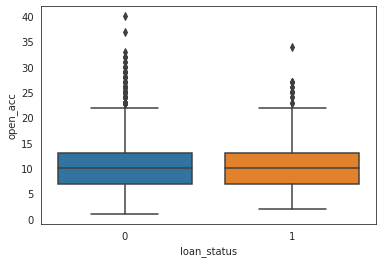

In [68]:
# open_acc
sns.boxplot(x = 'loan_status', y ='open_acc', data = vis_train_df)

This feature could be used for prediction

__The listed amount of the loan applied for by the borrower__

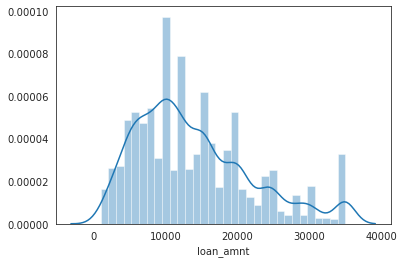

In [64]:
# loan_amnt
sns.distplot(vis_train_df.loan_amnt)

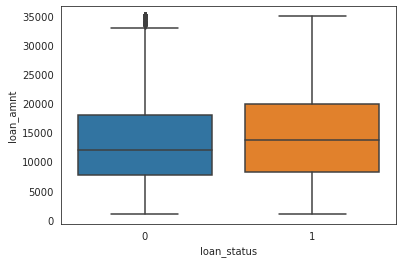

In [67]:
sns.boxplot(x = 'loan_status', y ='loan_amnt', data = vis_train_df)

This feature could be used for prediction

__The total amount committed to that loan at that point in time.__

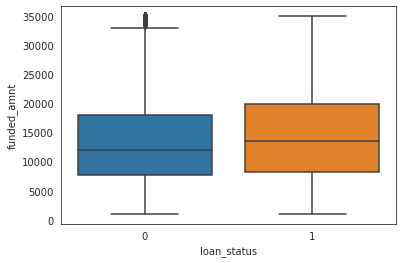

In [69]:
# funded_amnt
sns.boxplot(x = 'loan_status', y ='funded_amnt', data = vis_train_df)

This feature could be used for prediction

__The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years__

In [71]:
# # delinq_2yrs
vis_train_df['delinq_2yrs'].value_counts()


0    5667
1     662
2     161
3      61
4      20
5       6
6       4
7       3
9       1
8       1
Name: delinq_2yrs, dtype: int64

Possible to use for prediction.

__The number of inquiries in past 6 months (excluding auto and mortgage inquiries)__

In [75]:
# inq_last_6mths
vis_train_df['inq_last_6mths'].value_counts()


0    3062
1    2022
2     983
3     424
4      67
5      21
6       4
7       2
8       1
Name: inq_last_6mths, dtype: int64

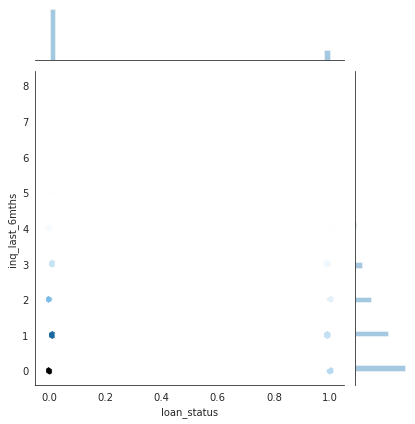

In [76]:
sns.jointplot(x='loan_status', y='inq_last_6mths', data=vis_train_df,kind="hex")

Could be to use for prediction.

__Number of derogatory public records__

In [77]:
# pub_rec
vis_train_df['pub_rec'].value_counts()


0    6019
1     502
2      40
3      17
4       5
6       1
9       1
5       1
Name: pub_rec, dtype: int64

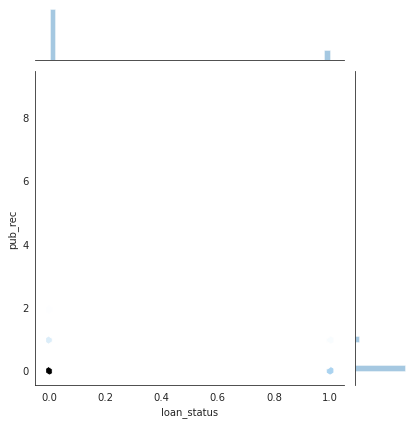

In [78]:
sns.jointplot(x='loan_status', y='pub_rec', data=vis_train_df,kind="hex")

Possible to use for prediction

__Total credit revolving balance__

In [79]:
# revol_bal
vis_train_df['revol_bal'].value_counts()


0        38
10249     4
11926     4
6565      4
9881      4
         ..
3215      1
17045     1
15505     1
3219      1
10193     1
Name: revol_bal, Length: 5846, dtype: int64

In [81]:
print(vis_train_df['revol_bal'].max())
print(vis_train_df['revol_bal'].min())

236666
0


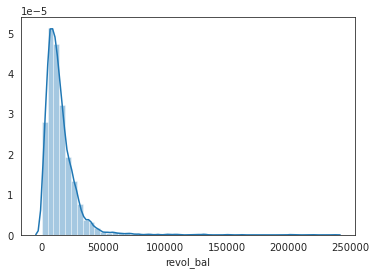

In [82]:
sns.distplot(vis_train_df.revol_bal)

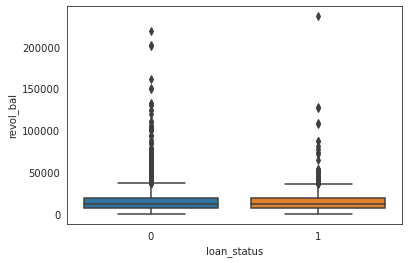

In [83]:
sns.boxplot(x = 'loan_status', y ='revol_bal', data = vis_train_df)

Possible to use for prediction.

__publicly available policy_code=1 new products not publicly available policy_code=2__

In [85]:
# policy_code
vis_train_df['policy_code'].value_counts()

1    6586
Name: policy_code, dtype: int64

Couldn't be used for prediction.

__Number of collections in 12 months excluding medical collection__


In [86]:
# collections_12_mths_ex_med
vis_train_df['collections_12_mths_ex_med'].value_counts()

0    6562
1      23
2       1
Name: collections_12_mths_ex_med, dtype: int64

Could not be use.

__int64 type feature summary__
features could be used for prediction model are:

loan_amnt, funded_amnt,delinq_2yrs, fico_range_low, fico_range_high, \
inq_last_6mths, open_acc, pub_rec, revol_bal, total_acc, last_fico_range_high, last_fico_range_low



In [88]:
selected_int_features = ["loan_amnt", "funded_amnt,delinq_2yrs", "fico_range_low", "fico_range_high", \
"inq_last_6mths", "open_acc", "pub_rec", "revol_bal", "total_acc", "last_fico_range_high", "last_fico_range_low"]

In [89]:
len(selected_int_features)

11

## float64 type features


__Features have 0 Null value__


In [92]:
no_null_float_features = ['funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'out_prncp', \
                    'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', \
                    'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt']

In [93]:
len(no_null_features)

14

In [94]:
vis_train_df[no_null_float_features].describe()

,funded_amnt_inv,installment,annual_inc,dti,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
count,6586.000000,6586.000000,6586.000000,6586.000000,6586.0,6586.0,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000
mean,13711.931421,414.684581,70690.569182,15.926965,0.0,0.0,15489.683547,15453.638069,12182.292795,3119.865742,1.092635,186.432378,23.004697,3985.130575
std,7914.950977,232.930244,44588.806908,7.025740,0.0,0.0,10306.316858,10271.092614,8011.445053,3257.562410,9.939914,901.585083,141.524390,5654.865858
min,1000.000000,32.230000,9600.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7950.000000,249.080000,45000.000000,10.680000,0.0,0.0,7846.645209,7839.910000,6000.000000,1014.820000,0.000000,0.000000,0.000000,341.640000
50%,12000.000000,366.860000,60000.000000,15.840000,0.0,0.0,13086.192582,13043.310000,10000.000000,2015.515000,0.000000,0.000000,0.000000,917.515000
75%,18000.000000,533.402500,85000.000000,20.880000,0.0,0.0,20744.544817,20672.087500,16000.000000,4002.210000,0.000000,0.000000,0.000000,5913.865000
max,35000.000000,1406.450000,1000000.000000,34.930000,0.0,0.0,59636.769736,59636.770000,35000.000000,24636.770000,536.760000,27009.470000,4772.525700,35436.920000


features that not used (0 on all quarters): __out_prncp, out_prncp_inv, total_rec_late_fee, recoveries, collection_recovery_fee__

In [100]:
no_null_float_features_kept = list( set(no_null_float_features).difference(set(['out_prncp', 'out_prncp_inv', \
                                                                            'total_rec_late_fee', 'recoveries', 'collection_recovery_fee'])))

In [101]:
no_null_float_features_kept

['funded_amnt_inv',
 'installment',
 'annual_inc',
 'last_pymnt_amnt',
 'dti',
 'total_pymnt_inv',
 'total_pymnt',
 'total_rec_int',
 'total_rec_prncp']

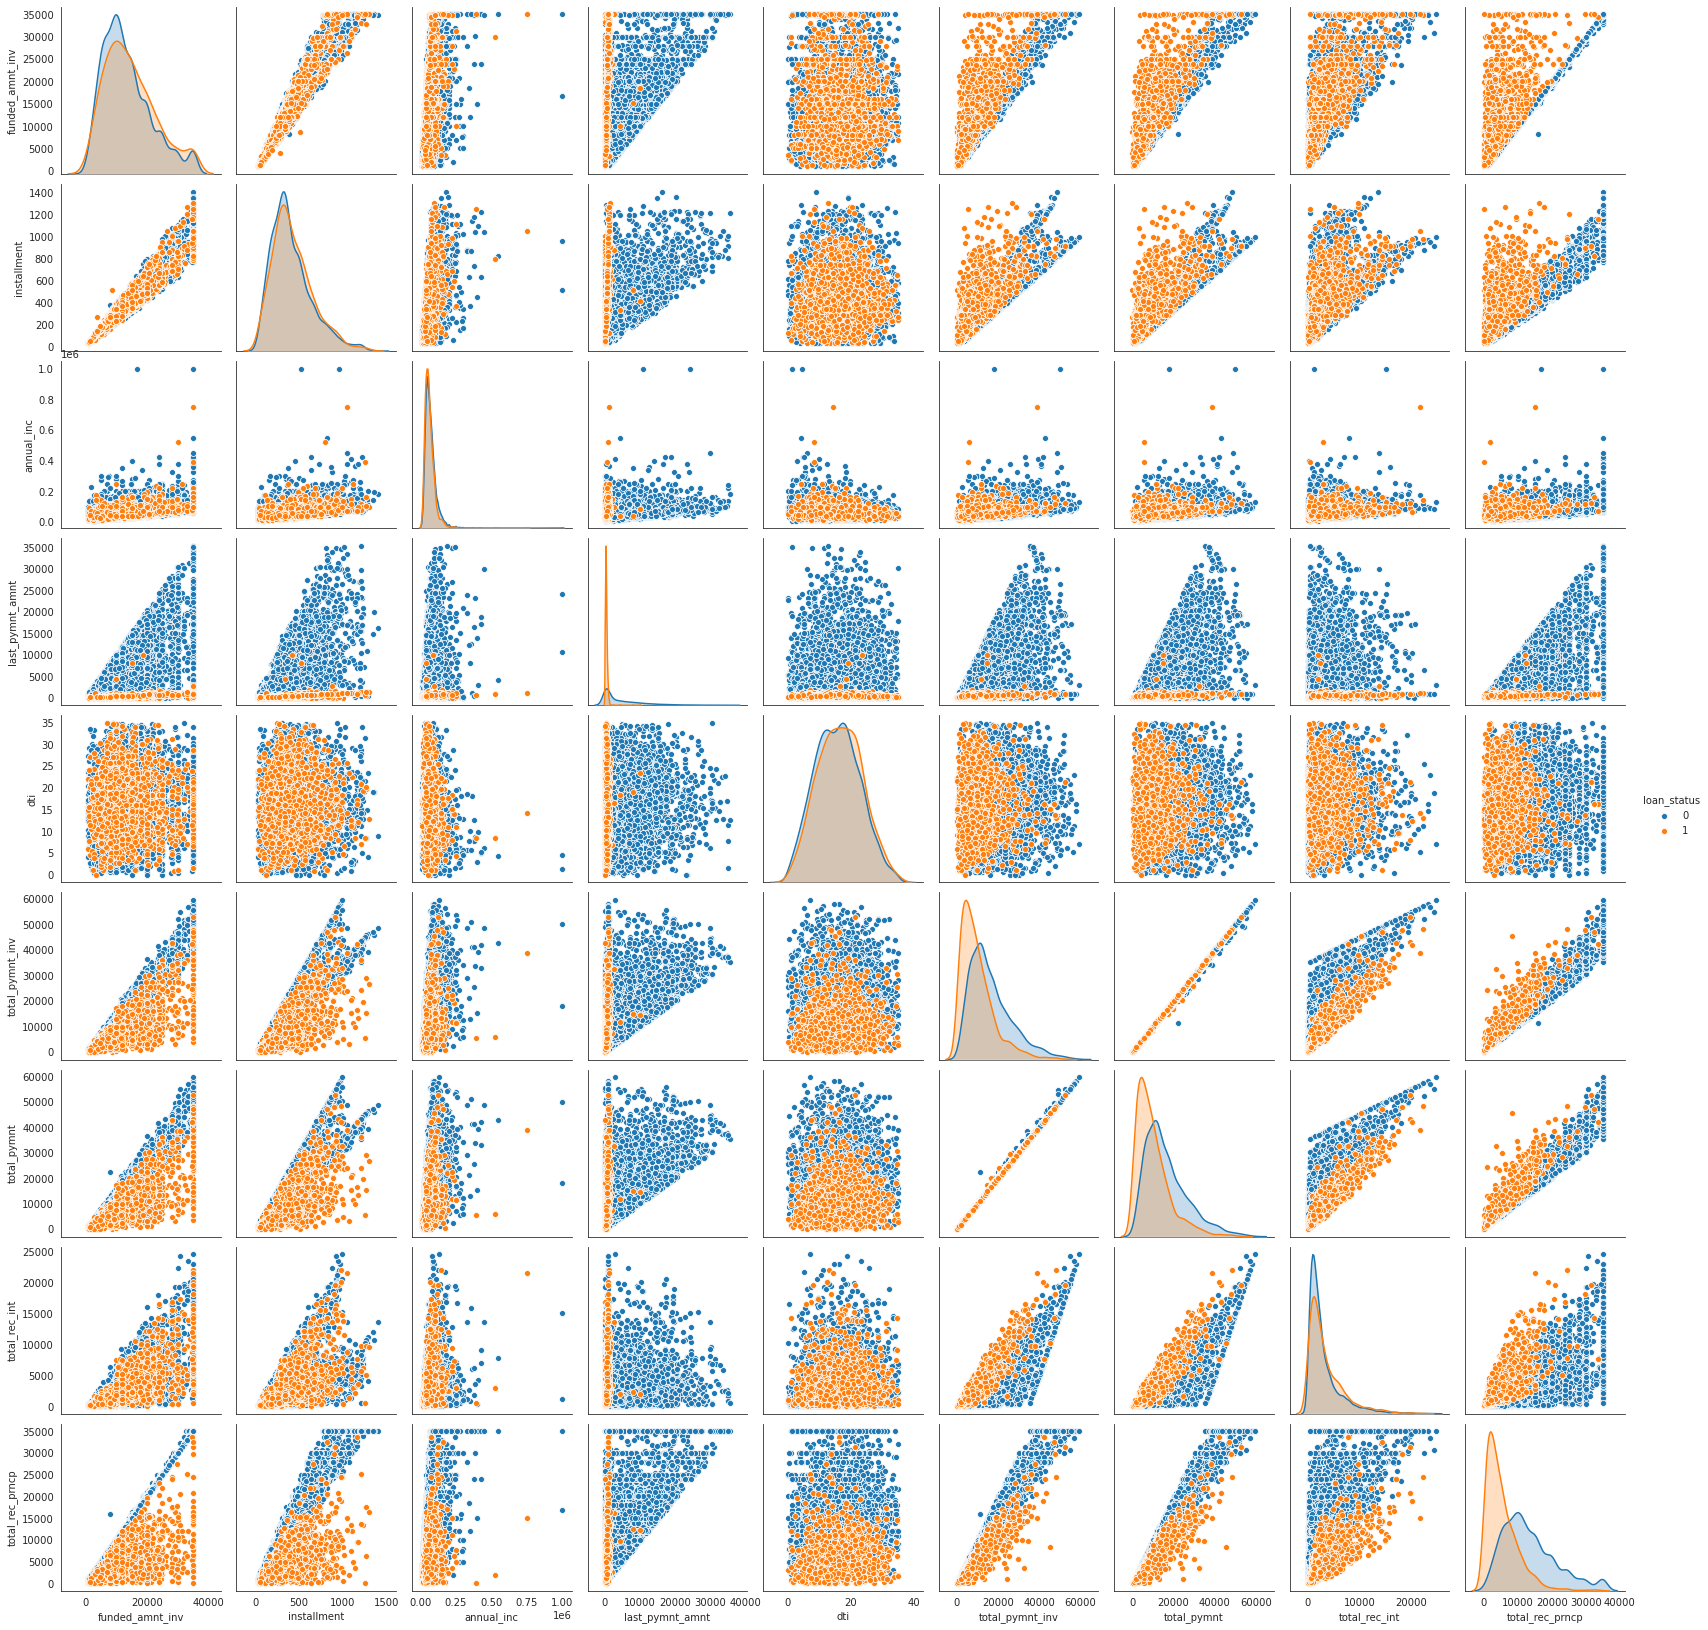

In [102]:
sns.pairplot(vis_train_df, vars=no_null_float_features_kept, hue='loan_status')

__Float type features that has missing values__

In [110]:
float_list = list(vis_train_df.select_dtypes('float64').columns)

In [111]:
float_hasNull_list = list(set(float_list).difference(set(no_null_float_features)))

In [113]:
len(float_hasNull_list)

38

In [114]:
vis_train_df[float_hasNull_list].describe()

,acc_open_past_24mths,bc_open_to_buy,pct_tl_nvr_dlq,num_tl_120dpd_2m,bc_util,total_rev_hi_lim,avg_cur_bal,num_actv_rev_tl,total_il_high_credit_limit,tot_coll_amt,tot_cur_bal,num_bc_sats,num_op_rev_tl,mths_since_recent_bc,num_tl_30dpd,num_il_tl,tot_hi_cred_lim,mo_sin_rcnt_tl,mo_sin_old_il_acct,mths_since_last_delinq,percent_bc_gt_75,total_bal_ex_mort,num_accts_ever_120_pd,mo_sin_old_rev_tl_op,num_rev_accts,mort_acc,num_actv_bc_tl,total_bc_limit,mths_since_recent_inq,mths_since_recent_revol_delinq,num_rev_tl_bal_gt_0,mo_sin_rcnt_rev_tl_op,mths_since_last_major_derog,mths_since_recent_bc_dlq,num_bc_tl,num_sats,num_tl_op_past_12m,num_tl_90g_dpd_24m
count,3354.000000,3326.000000,3354.000000,3249.000000,3325.000000,3354.000000,3354.000000,3354.000000,3354.000000,3354.000000,3.354000e+03,3354.000000,3354.000000,3329.000000,3354.000000,3354.000000,3.354000e+03,3354.000000,3243.000000,2544.000000,3326.000000,3354.000000,3354.000000,3354.000000,3354.000000,3354.000000,3354.000000,3354.000000,3060.000000,1120.000000,3354.000000,3354.000000,767.000000,822.000000,3354.000000,3354.000000,3354.000000,3354.000000
mean,4.353608,7863.983764,95.139952,0.000616,66.794526,28596.768933,13383.187835,5.827967,39603.464222,110.983602,1.401657e+05,4.672928,8.136255,23.405527,0.001491,8.771616,1.690968e+05,7.659511,127.063830,35.497642,51.573716,47276.697376,0.396541,176.829756,15.163983,1.837209,3.706619,19156.683959,6.658824,34.693750,5.820215,12.830352,42.358540,39.714112,8.812463,11.492546,1.914729,0.074538
std,2.795155,12532.619126,7.461493,0.035088,24.813450,24588.205717,15359.531725,2.920241,38632.723687,867.524127,1.494054e+05,2.535416,3.868042,26.793136,0.038587,7.390175,1.658496e+05,8.600300,51.781227,21.533264,34.183915,40470.950484,1.174919,87.313986,7.639230,2.178106,2.033958,18782.433459,5.739462,21.535389,2.926100,15.660567,20.424043,21.988642,4.876251,4.735797,1.475681,0.407712
min,0.000000,0.000000,33.300000,0.000000,0.000000,0.000000,256.000000,0.000000,0.000000,0.000000,3.070000e+02,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000e+02,0.000000,0.000000,0.000000,0.000000,307.000000,0.000000,13.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,1173.750000,92.900000,0.000000,50.100000,13712.500000,3073.000000,4.000000,13600.750000,0.000000,2.959100e+04,3.000000,5.000000,6.000000,0.000000,4.000000,4.567975e+04,3.000000,97.500000,17.000000,25.000000,20879.000000,0.000000,114.000000,10.000000,0.000000,2.000000,7500.000000,2.000000,16.000000,4.000000,3.000000,26.000000,21.000000,5.000000,8.000000,1.000000,0.000000
50%,4.000000,3399.000000,100.000000,0.000000,71.100000,22300.000000,7615.500000,5.000000,29953.500000,0.000000,8.345350e+04,4.000000,8.000000,14.000000,0.000000,7.000000,1.112035e+05,5.000000,129.000000,34.000000,50.000000,36553.500000,0.000000,161.000000,14.000000,1.000000,3.000000,13500.000000,5.000000,32.000000,5.000000,8.000000,42.000000,39.000000,8.000000,11.000000,2.000000,0.000000
75%,6.000000,8911.750000,100.000000,0.000000,87.800000,36200.000000,18586.250000,7.000000,54727.000000,0.000000,2.109215e+05,6.000000,10.000000,29.000000,0.000000,12.000000,2.500922e+05,10.000000,153.000000,51.000000,80.000000,60950.500000,0.000000,225.000000,19.000000,3.000000,5.000000,25000.000000,10.000000,49.250000,7.000000,16.000000,59.000000,58.000000,11.000000,14.000000,3.000000,0.000000
max,22.000000,162694.000000,100.000000,2.000000,109.700000,334500.000000,161880.000000,24.000000,374384.000000,21699.000000,1.537795e+06,21.000000,29.000000,254.000000,1.000000,54.000000,1.632423e+06,102.000000,384.000000,110.000000,100.000000,454049.000000,20.000000,557.000000,51.000000,15.000000,17.000000,262000.000000,24.000000,84.000000,24.000000,221.000000,110.000000,84.000000,38.000000,40.000000,15.000000,8.000000


**suspceted** : 

num_tl_30dpd,
num_tl_120dpd_2m, 
num_tl_90g_dpd_24m
tot_coll_amt, 
num_accts_ever_120_pd, 

**look like Int or Categorical:**

mort_acc,
num_actv_rev_tl,
num_op_rev_tl,
nths_since_recent_bc,
num_il_tl,
mo_sin_rcnt_tl,
mths_since_last_delinq,
num_rev_accts,
mths_since_recent_inq,
num_rev_tl_bal_gt_0,
mths_since_last_major_derog,
num_bc_tl,
num_tl_op_past_12m,







__Missing values impuptation__

There are several schemes for imputation of missing values as introduced in [sklearn](https://scikitlearn.org/stable/modules/impute.html)

At this moment, since the tree model will be applied, just use -999.9 to replace the Nulls that the tree model should handle it well.


In [1]:
vis_train_df[float_hasNull_list] = vis_train_df[float_hasNull_list].fillna(-999.9)

NameError: name 'vis_train_df' is not defined

In [120]:
vis_train_df[float_hasNull_list].describe()

,acc_open_past_24mths,bc_open_to_buy,pct_tl_nvr_dlq,num_tl_120dpd_2m,bc_util,total_rev_hi_lim,avg_cur_bal,num_actv_rev_tl,total_il_high_credit_limit,tot_coll_amt,tot_cur_bal,num_bc_sats,num_op_rev_tl,mths_since_recent_bc,num_tl_30dpd,num_il_tl,tot_hi_cred_lim,mo_sin_rcnt_tl,mo_sin_old_il_acct,mths_since_last_delinq,percent_bc_gt_75,total_bal_ex_mort,num_accts_ever_120_pd,mo_sin_old_rev_tl_op,num_rev_accts,mort_acc,num_actv_bc_tl,total_bc_limit,mths_since_recent_inq,mths_since_recent_revol_delinq,num_rev_tl_bal_gt_0,mo_sin_rcnt_rev_tl_op,mths_since_last_major_derog,mths_since_recent_bc_dlq,num_bc_tl,num_sats,num_tl_op_past_12m,num_tl_90g_dpd_24m
count,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6.586000e+03,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6.586000e+03,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000
mean,-488.471728,3476.455512,-442.237686,-506.629866,-461.369891,14072.560917,6324.861099,-487.720893,19677.853356,-434.169116,7.089041e+04,-488.309110,-486.545369,-482.653705,-490.688096,-486.221804,8.562388e+04,-486.788157,-444.973838,-599.952900,-468.894598,23585.539964,-490.486912,-400.636168,-482.966414,-489.753234,-488.801215,9265.083693,-532.230701,-823.959368,-487.724841,-484.154844,-878.519450,-870.145551,-486.201002,-484.836137,-489.713756,-490.650896
std,502.082726,9947.441151,547.493484,499.943634,533.653852,22951.978969,13108.527682,502.820191,34235.002614,831.667091,1.278556e+05,502.241668,503.977465,512.015449,499.902915,504.315129,1.457312e+05,503.768939,564.629931,504.345379,526.311214,37636.991923,500.101123,591.598600,507.512711,500.823097,501.757400,16768.530628,502.071370,388.810653,502.816333,506.440038,334.428131,343.709978,504.319982,505.659184,500.860548,499.939519
min,-999.900000,-999.900000,-999.900000,-999.900000,-999.900000,-999.900000,-999.900000,-999.900000,-999.900000,-999.900000,-9.999000e+02,-999.900000,-999.900000,-999.900000,-999.900000,-999.900000,-9.999000e+02,-999.900000,-999.900000,-999.900000,-999.900000,-999.900000,-999.900000,-999.900000,-999.900000,-999.900000,-999.900000,-999.900000,-999.900000,-999.900000,-999.900000,-999.900000,-999.900000,-999.900000,-999.900000,-999.900000,-999.900000,-999.900000
25%,-999.900000,-999.900000,-999.900000,-999.900000,-999.900000,-999.900000,-999.900000,-999.900000,-999.900000,-999.900000,-9.999000e+02,-999.900000,-999.900000,-999.900000,-999.900000,-999.900000,-9.999000e+02,-999.900000,-999.900000,-999.900000,-999.900000,-999.900000,-999.900000,-999.900000,-999.900000,-999.900000,-999.900000,-999.900000,-999.900000,-999.900000,-999.900000,-999.900000,-999.900000,-999.900000,-999.900000,-999.900000,-999.900000,-999.900000
50%,0.000000,0.000000,72.000000,-999.900000,1.850000,4400.000000,791.000000,1.000000,0.000000,0.000000,5.792500e+03,1.000000,2.000000,0.000000,0.000000,0.000000,1.187950e+04,0.000000,-999.900000,-999.900000,0.000000,5034.500000,0.000000,43.000000,4.000000,0.000000,1.000000,1100.000000,-999.900000,-999.900000,1.000000,0.000000,-999.900000,-999.900000,2.000000,4.000000,0.000000,0.000000
75%,4.000000,3479.000000,100.000000,0.000000,71.475000,22600.000000,7874.500000,5.000000,30554.000000,0.000000,8.819200e+04,4.000000,8.000000,15.000000,0.000000,7.000000,1.156052e+05,5.000000,128.000000,23.000000,50.000000,37234.000000,0.000000,162.000000,14.000000,1.000000,3.000000,13800.000000,5.000000,-999.900000,5.000000,8.000000,-999.900000,-999.900000,8.000000,11.000000,2.000000,0.000000
max,22.000000,162694.000000,100.000000,2.000000,109.700000,334500.000000,161880.000000,24.000000,374384.000000,21699.000000,1.537795e+06,21.000000,29.000000,254.000000,1.000000,54.000000,1.632423e+06,102.000000,384.000000,110.000000,100.000000,454049.000000,20.000000

## Object datatype features

Object datatype could be string, categorical, int, and float

__The number of payments on the loan. Values are in months and can be either 36 or 60__

In [123]:
# term
vis_train_df['term'].value_counts()

 36 months    4720
 60 months    1866
Name: term, dtype: int64

This faeture could convert to numerical by label encoding

__Interest Rate on the loan__

In [125]:
sum(vis_train_df['int_rate'].isnull())

0

In [126]:
# int_rate
vis_train_df['int_rate'].value_counts()

  7.90%    332
  8.90%    308
 11.71%    257
 11.99%    229
 12.69%    216
          ... 
  6.00%      4
 22.74%      3
 24.11%      2
 25.99%      1
 26.06%      1
Name: int_rate, Length: 66, dtype: int64

In [131]:
vis_train_df['int_rate'].head()

id
1077501     10.65%
1077430     15.27%
1077175     15.96%
1076863     13.49%
1075358     12.69%
Name: int_rate, dtype: object

In [132]:
# convert to float with regex 
# "\d+\.\d+"
vis_train_df['int_rate'].str.extract(r"(\d+\.\d+)").astype('float')

,0
id,
1077501,10.65
1077430,15.27
1077175,15.96
1076863,13.49
1075358,12.69
...,...
10085132,6.03
8999284,7.90
9027724,9.67


This fature convert to float type

__LC assigned loan grade__

Loan grade and subgrade has different trench, so it's ordinal as listed in [LC website](https://www.lendingclub.com/foliofn/rateDetail.action)

In [133]:
# grade
vis_train_df['grade'].value_counts()

B    2036
C    1651
A    1190
D     988
E     507
F     175
G      39
Name: grade, dtype: int64

Label Encoding

__LC assigned loan subgrade__

Loan subgrade has different trench, so it's ordinal as listed in [LC website](https://www.lendingclub.com/foliofn/rateDetail.action)

In [135]:
# sub_grade
vis_train_df['sub_grade'].value_counts()

B3    487
B5    433
B4    421
C1    415
C2    392
B2    357
B1    338
A4    332
A5    308
C3    308
C4    280
C5    256
D2    227
D3    226
A3    219
D1    215
A2    177
D4    172
A1    154
D5    148
E1    131
E2    129
E3     87
E5     81
E4     79
F1     65
F2     35
F3     31
F4     30
F5     14
G3     11
G1     10
G2      9
G4      6
G5      3
Name: sub_grade, dtype: int64

Label Encoding, if have extra time, could try mean_coding

__The home ownership status provided by the borrower during registration?__

In [137]:
# home_ownership
vis_train_df['home_ownership'].value_counts()

RENT        3065
MORTGAGE    2998
OWN          523
Name: home_ownership, dtype: int64

Label Encoding

__Indicates if income was verified by LC, not verified, or if the income source was verified__

In [138]:
# verification_status
vis_train_df['verification_status'].value_counts()

Verified           2497
Not Verified       2088
Source Verified    2001
Name: verification_status, dtype: int64

Label Encoding

__The month which the loan was funded__

In [139]:
# issue_d
vis_train_df['issue_d'].value_counts()

Dec-2013    3354
Dec-2011    2266
Nov-2011     966
Name: issue_d, dtype: int64

Label Encoding, if have extra time, separate into year + month

__Indicates if a payment plan has been put in place for the loan__

In [141]:
# pymnt_plan
vis_train_df['pymnt_plan'].value_counts()

n    6586
Name: pymnt_plan, dtype: int64

Cannot use this feature

__URL for the LC page with listing data.__

In [142]:
# url
vis_train_df['url'].value_counts()

https://lendingclub.com/browse/loanDetail.action?loan_id=1026727     1
https://lendingclub.com/browse/loanDetail.action?loan_id=10095148    1
https://lendingclub.com/browse/loanDetail.action?loan_id=10089158    1
https://lendingclub.com/browse/loanDetail.action?loan_id=1068558     1
https://lendingclub.com/browse/loanDetail.action?loan_id=9424755     1
                                                                    ..
https://lendingclub.com/browse/loanDetail.action?loan_id=10014692    1
https://lendingclub.com/browse/loanDetail.action?loan_id=10136054    1
https://lendingclub.com/browse/loanDetail.action?loan_id=10156055    1
https://lendingclub.com/browse/loanDetail.action?loan_id=1048390     1
https://lendingclub.com/browse/loanDetail.action?loan_id=1045509     1
Name: url, Length: 6586, dtype: int64

In [152]:
copy_full_df = copy.copy(full_clean_df)

In [153]:
vis_rest_df = copy_full_df.reset_index()
vis_rest_df[['url','id']].head()

,url,id
0,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,1077501
1,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,1077430
2,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,1077175
3,https://lendingclub.com/browse/loanDetail.action?loan_id=1076863,1076863
4,https://lendingclub.com/browse/loanDetail.action?loan_id=1075358,1075358


looks like the url repeats the "id" infomration, so will not use this feature.

__A category provided by the borrower for the loan request.__

In [154]:
# purpose
copy_full_df['purpose'].value_counts()

debt_consolidation    3670
credit_card           1653
other                  386
home_improvement       290
small_business         136
major_purchase         125
car                     91
medical                 62
moving                  47
wedding                 45
vacation                42
house                   33
renewable_energy         6
Name: purpose, dtype: int64

Label Encoding

__The loan title provided by the borrower__

In [155]:
# title
copy_full_df['title'].value_counts()

Debt consolidation            529
Debt Consolidation            435
Debt Consolidation Loan       353
Credit card refinancing       158
Consolidation                 156
                             ... 
Year End Cleanup                1
CONSOLIDATING CREDIT CARDS      1
Life Management                 1
death consolidation             1
Brown Eyes Loan                 1
Name: title, Length: 2656, dtype: int64

Label Encoding

__The first 3 numbers of the zip code provided by the borrower in the loan application.__

In [156]:
# last_pymnt_d
copy_full_df['zip_code'].value_counts()

945xx    88
112xx    87
100xx    76
606xx    76
750xx    74
         ..
593xx     1
138xx     1
279xx     1
561xx     1
655xx     1
Name: zip_code, Length: 710, dtype: int64

Label Encoding

__The state provided by the borrower in the loan application__

In [158]:
# addr_state
copy_full_df['addr_state'].value_counts()

CA    1032
NY     656
TX     507
FL     447
NJ     293
IL     248
GA     239
VA     216
PA     210
OH     204
NC     185
MA     179
WA     164
MD     140
CT     132
CO     128
MI     126
MO     126
AZ     123
MN     108
OR      82
NV      82
IN      76
WI      76
SC      74
AL      71
LA      61
KS      57
UT      54
TN      50
KY      49
OK      48
HI      41
AR      41
WV      35
RI      34
NH      32
NM      32
AK      26
DC      22
MT      18
VT      17
SD      17
WY      16
DE      12
Name: addr_state, dtype: int64

Label Encoding

__The month the borrower's earliest reported credit line was opened__

In [159]:
# earliest_cr_line
copy_full_df['earliest_cr_line'].value_counts()

Nov-1998    60
Aug-2000    60
Oct-1999    55
Sep-1998    53
Oct-2000    52
            ..
Mar-1978     1
Nov-1970     1
Oct-1978     1
Aug-1974     1
May-2009     1
Name: earliest_cr_line, Length: 443, dtype: int64

In [169]:
pd.to_datetime(copy_full_df['earliest_cr_line'], format="%b-%Y").apply(lambda x:x.year)

id
1077501     1985
1077430     1999
1077175     2001
1076863     1996
1075358     1996
            ... 
10085132    1995
8999284     1991
9027724     1994
10175044    2004
10135034    1990
Name: earliest_cr_line, Length: 6586, dtype: int64

In [171]:
pd.to_datetime(copy_full_df['earliest_cr_line'], format="%b-%Y").apply(lambda x:x.month)

id
1077501      1
1077430      4
1077175     11
1076863      2
1075358      1
            ..
10085132     6
8999284      3
9027724      2
10175044    12
10135034     8
Name: earliest_cr_line, Length: 6586, dtype: int64

Transform to Year and Month

__The initial listing status of the loan. Possible values areC W, F__

In [172]:
# initial_list_status
copy_full_df['initial_list_status'].value_counts()

f    5569
w    1017
Name: initial_list_status, dtype: int64

Label Encoding

__The most recent month LC pulled credit for this loan__

In [174]:
# last_credit_pull_d
copy_full_df['last_credit_pull_d'].value_counts()

Jul-2020    1313
Oct-2016     628
Dec-2016     198
Dec-2014     189
Mar-2020     166
            ... 
Oct-2012       5
Jan-2012       4
Dec-2011       3
Aug-2013       3
Nov-2011       1
Name: last_credit_pull_d, Length: 104, dtype: int64

Transform to Year + Month

__Indicates whether the loan is an individual application or a joint application with two co-borrowers__

In [175]:
# application_type
copy_full_df['application_type'].value_counts()

Individual    6586
Name: application_type, dtype: int64

Not use thes feature


__Flags whether or not the borrower is on a hardship plan__

In [176]:
# hardship_flag
copy_full_df['hardship_flag'].value_counts()

N    6586
Name: hardship_flag, dtype: int64

Not use this feature

__Flags whether or not the borrower, who has charged-off, is working with a debt-settlement company.__

In [177]:
# debt_settlement_flag
copy_full_df['debt_settlement_flag'].value_counts()

N    6526
Y      60
Name: debt_settlement_flag, dtype: int64

Data leakage?

In [180]:
sum(copy_full_df[copy_full_df['debt_settlement_flag']=='Y'].loan_status)

60

Possible lead to data leak if use this feature, so do not use 

__Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.__

In [182]:
# revol_util
copy_full_df['revol_util'].value_counts()

0%        38
65%       21
61%       20
72.2%     18
75%       18
          ..
1.5%       1
8.9%       1
1.3%       1
15.2%      1
100.8%     1
Name: revol_util, Length: 986, dtype: int64

In [183]:
copy_full_df['revol_util'].str.extract(r"(\d+\.\d+)").astype('float')

,0
id,
1077501,83.7
1077430,9.4
1077175,98.5
1076863,NaN
1075358,53.9
...,...
10085132,34.1
8999284,71.5
9027724,41.7


In [184]:
sum(copy_full_df['revol_util'].isnull())

1

convert to float, has 1 missing values, may use -999.9 to replace

__Last month payment was received__

In [185]:
# last_pymnt_d
copy_full_df['last_pymnt_d'].value_counts()

Dec-2014    776
Jan-2017    539
Dec-2016    375
Jan-2015    275
Oct-2014    157
           ... 
Apr-2017      6
Sep-2018      5
Dec-2011      2
May-2019      1
Mar-2019      1
Name: last_pymnt_d, Length: 89, dtype: int64

In [186]:
sum(copy_full_df['last_pymnt_d'].isnull())

4

Year + Month, missing values use -999

__Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.__

In [187]:
# emp_length
copy_full_df['emp_length'].value_counts()

10+ years    1920
2 years       629
< 1 year      553
5 years       536
3 years       536
4 years       455
1 year        429
6 years       418
7 years       389
8 years       265
9 years       240
Name: emp_length, dtype: int64

In [191]:
copy_full_df['emp_length'] = copy_full_df['emp_length'].fillna('-999')

In [193]:
sum(copy_full_df['emp_length'].isnull())

0

In [ ]:
copy_full_df['emp_length'].str.extract(r"([-+]?[0-9]+)").astype('float').astype('int')

ordinal encoding

__The job title supplied by the Borrower when applying for the loan__

In [215]:
# emp_title
copy_full_df['emp_title'].value_counts()

Teacher                          86
Manager                          52
RN                               30
Project Manager                  27
Engineer                         25
                                 ..
Burson-Marsteller                 1
chiller mechanic                  1
Central Washington University     1
Drive/Material Handler            1
Dynamic / NDL                     1
Name: emp_title, Length: 5105, dtype: int64

Label Encoding

__Loan description provided by the borrower__

In [216]:
# desc
copy_full_df['desc'].value_counts()

  Borrower added on 12/30/13 > Debt consolidation<br>                                                                                                                                                                                                                                                                                     5
  Borrower added on 12/06/11 > Debt consolidation<br>                                                                                                                                                                                                                                                                                     2
  Borrower added on 12/30/13 > pay off credit cards<br>                                                                                                                                                                                                                                                                                   2
  Bo

tf-idf? word-embdding? len of the desc? 